# Practical Work 6

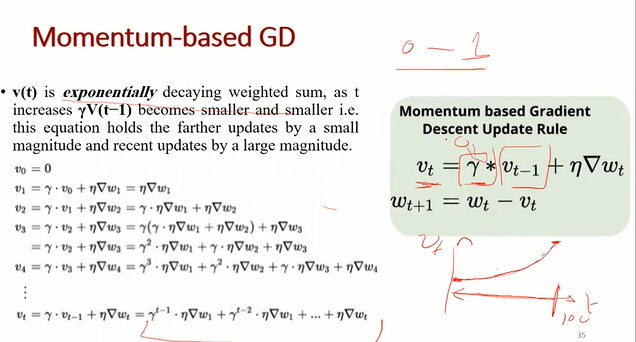

- For this practical work, the trainees will develop a Python program that is able to implement the gradient descent in order to achieve the linear regression (Multivariables) of a set of datapoints.
- We will do a vectorize implementation (Using Matrix vectors operations) which is the more general and effecient form of GD implementation.
- As we did with the single variable we will do step by step implementation then combine all steps togeteher then make a function for the Multivariables LR training using GD.

### Prerequisites:
- You should have seen <b>Day 1 and Day 2 as well as Day 3 Part 1</b> from our course <b><i>Master Numerical Optimization for Machine Learning and Deep Learning in 5 Days</b></i>.
- The course is available for free on our channel <b><i>Artificial Intelligence & Data Science شرح بالعربي</i></b>.
- Course link https://youtube.com/playlist?list=PLJM7jJIw2GC15hvIwN8sBXok__yLMcMxN&feature=shared

### Whatsapp Channel: 
https://whatsapp.com/channel/0029Va0cflnId7nVMfzByO3k

### Import numpy, matplotlib.pyplot

In [2]:
def plot_loss(Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(Losses,'-*',markersize=8)
    plt.show()
    
def plot_theta_loss(Th,Th_0_1,Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel(Th_0_1,fontsize=14,fontweight='bold')
    plt.ylabel('Loss',fontsize=14,fontweight='bold')
    plt.plot(Th,Losses,'-mo',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()
    

In [3]:
import numpy as np ,matplotlib.pyplot as plt,seaborn as sns ,plotly.express as px

### Read MultiVarLR.csv file into numpy array 

In [4]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

In [5]:
m=len(data)

In [6]:
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

### Define variables X and y. 
### Assign all columns data except the last one to X and last column to y
<b>Notes:</b> 
- We have here 3 independent variables and one dependent variable.
- Make sure <b>y</b> is a column vector to obtain correct matrix vector operations.

In [7]:
X=data[:,0:3]
print(X)
print(X.shape)


[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
(25, 3)


In [8]:
Y=data[:,3]
Y

array([152., 185., 180., 196., 142., 101., 149., 115., 175., 164., 141.,
       141., 184., 152., 148., 192., 147., 183., 177., 159., 177., 175.,
       175., 149., 192.])

In [9]:
Y.shape
Y=Y.reshape(-1,1)
Y

array([[152.],
       [185.],
       [180.],
       [196.],
       [142.],
       [101.],
       [149.],
       [115.],
       [175.],
       [164.],
       [141.],
       [141.],
       [184.],
       [152.],
       [148.],
       [192.],
       [147.],
       [183.],
       [177.],
       [159.],
       [177.],
       [175.],
       [175.],
       [149.],
       [192.]])

### Add column of ones to the X data matrix to be X0 variable for theta0 parameters.
- The model has X1,X2, and X3 variables and theta0, theta1, theta3, and theta4 parameters. So, we need X0 for theta0 to have consistent <b>X matrix</b> dimensions.

In [71]:
ones_col= np.ones(  (m, 1))
x=data[:,0:3]
x_new= np.hstack(   (      ones_col , x     )   ) #or

x=data[:,0:3]
x_new=np.concatenate( (ones_col,x) ,axis=1 )   #25*4

x_new

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

### Step 1: Initialize model parameters as 4 by 1 column vector of zeros.

In [11]:
n_1=data.shape[1]
Th=np.zeros((n_1,1))
Th

array([[0.],
       [0.],
       [0.],
       [0.]])

### Step 2: Calculate model outpt y for all data points using matrix vector multiplication.
###  $$h(x) = X\theta$$

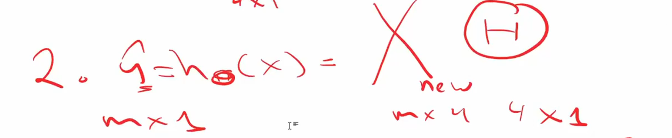

In [12]:
H=X@Th    #  25*4   @ 4*1 ==>    25*1
H

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

### Step 3: Calculate the MSE Cost function.
- You should calculate the error vector first <b>e = h - y</b> then use it for cost function calculation.
- We will also need this error vector in gradient vector calculation.

In [13]:
E=H-Y    #  25*1 -   25*1  ==>25*1 
print(H.shape,Y.shape)
E.shape

(25, 1) (25, 1)


(25, 1)

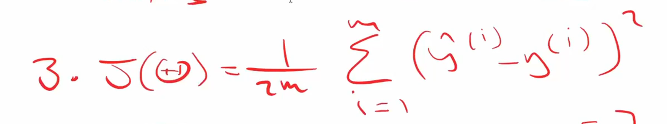

In [14]:
j=np.linalg.norm(E)**2/(2*m)
j

13405.98

### Step 4: Calculate the gradient vector
- In this step we will not calculate each gradient component for each parameter individually.
- We will use the error vector and calculate the gradient vector by multiplying the data matrix transpose with the error vector .
###  $$\nabla =\frac{X^Te}{m}$$

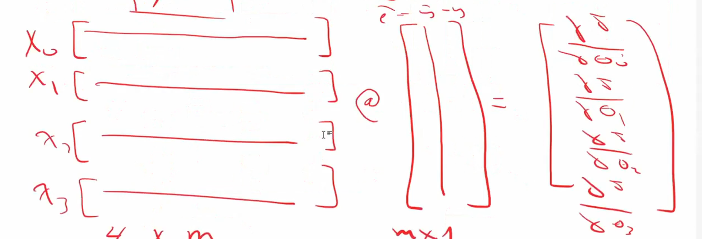

In [15]:
grad=(X.T @E )/m    #  4*25 @  25*1 ==>4*1
grad

array([[  -162.04],
       [-13075.8 ],
       [-13147.2 ],
       [-13467.08]])

### Step 5: Check if gradient norm < critical value (stop condition) e.g. 0.1

In [16]:

grad_norm=np.linalg.norm(grad)
print(grad_norm)

22917.545989219703


### Step6: Update the parameters (use 0.00001 learning rate)

In [17]:
gama=.0001
alpha=0.00001
v_prev=0


In [18]:
print(Th)
print(grad)
v_cur=   gama*v_prev -(alpha*grad)
Th=Th-v_cur
Th

[[0.]
 [0.]
 [0.]
 [0.]]
[[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]


array([[-0.0016204],
       [-0.130758 ],
       [-0.131472 ],
       [-0.1346708]])

### Step 7: Combine all the previous steps and iterate untill you reach the critical value of the gradient norm or cost convergence check .
- learning rate = 0.00001.
- Maximum number of iterations = 10000.
- Stop condition grad_norm < 0.1.
- Cost convergence check <b>abs(cost[i] - cost[i-1]) < 0.001 </b>

### In order to plot the learning curves you need to save thetas and cost each iteration.

In [19]:

m=data.shape[0] 
n_1=data.shape[1]
aplha=0.00001
gama=0.0001
max_iter=10000
v_prev=0
grad_check=0.1
conv_check=0.001
th=np.zeros((4,1))
loss=[]
theats_arr=[]
for i in range(max_iter):
    print(f"****************** Iteration  {i} ******************** \n")
    theats_arr.append(th)
    h=X@th                                  #  25*4   @ 4*1   ==>    25*1
    print(f" h(x) = \n{h}")
    e=h-Y                                   #  25*1 -   25*1  ==>25*1 
    print(f"E(x) = \n{e}")
    j=np.linalg.norm(e)**2/(2*m)
    print(f"J = \n{j}")
    loss.append(j)
    grad=(X.T @e )/m                        #  4*25 @  25*1 ==>4*1
    print(f"grad = {grad}")
    grad_norm=np.linalg.norm(grad)
    print(f"grad_norm = \n{grad_norm}")
    if grad_norm<grad_check:
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break 
    if i>0 and  np.absolute(loss[i-1]-loss[i]) < conv_check :
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break
    v_cur= gama*v_prev +(aplha*grad)
    th=th-v_cur
    v_prev+=v_cur
    print(f"new_theats = \n{th}")
    

    

****************** Iteration  0 ******************** 

 h(x) = 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
E(x) = 
[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]
J = 
13405.98
grad = [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
grad_norm = 
22917.545989219703
new_theats = 
[[0.0016204]
 [0.130758 ]
 [0.131472 ]
 [0.1346708]]
****************** Iteration  1 ******************** 

 h(x) = 
[[30.1650244]
 [36.2560348]
 [35.7234064]
 [38.9057244]
 [27.6510624]
 [20.3864004]
 [29.122502 ]
 [21.5899264]
 [33.8842264]
 [31.3855728]
 [28.0579308]
 [27.6659996]
 [36.9069972]
 [30.6802308]
 [29.2564588]
 [36.7915192]
 [29.2187588]
 [34.9498828]
 [35.1854372]
 [31.482572 ]
 [34.1507404]
 [34.0132136]
 [32.5

### Predict y values using the LR equation 
- Now we will use the obtained obtimum parameters <b>thetas</b> to make predition using the equation: 
###  $$h(x) = X\theta$$

In [20]:
h=X@th
h

array([[153.93244595],
       [185.02747334],
       [182.30217097],
       [198.5499771 ],
       [141.10979524],
       [104.0502437 ],
       [148.63093963],
       [110.19855113],
       [172.93589207],
       [160.2021039 ],
       [143.19333009],
       [141.20168689],
       [188.33430735],
       [156.54895361],
       [149.31735811],
       [187.76664966],
       [149.08589475],
       [178.37394099],
       [179.5460916 ],
       [160.6510008 ],
       [174.29226534],
       [173.58850443],
       [166.17009653],
       [155.17958514],
       [191.75296517]])

### Use R Squared metrics to evaluate LR equation output
- Can be found in <b>sklearn.metrics</b>

https://www.youtube.com/watch?v=KccCy0hu-dM

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_score(Y,h) 

0.978955235343897

### Plot loss vs. iterations

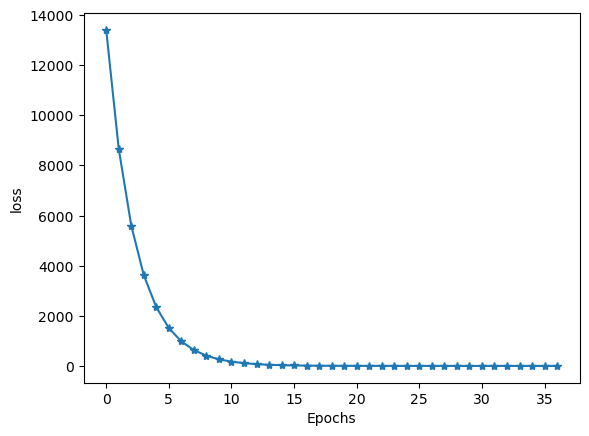

In [23]:
plt.figure()
plt.plot(loss,'*-')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()



### Plot loss vs. each theta

In [24]:
array=np.array(theats_arr)
print (array.shape)                                  ##########important 
array=array.reshape((len(theats_arr),n_1))
print (array.shape)                                  
print (array)


(37, 4, 1)
(37, 4)
[[0.         0.         0.         0.        ]
 [0.0016204  0.130758   0.131472   0.1346708 ]
 [0.00292337 0.23589597 0.23718299 0.24297973]
 [0.00397109 0.32043221 0.32217887 0.33009039]
 [0.00481355 0.38840205 0.3905172  0.40015497]
 [0.00549096 0.44305042 0.44546076 0.45651234]
 [0.00603565 0.48698665 0.48963323 0.50184739]
 [0.00647361 0.52230896 0.52514439 0.5383191 ]
 [0.00682576 0.5507046  0.55369076 0.56766356]
 [0.00710889 0.57353032 0.57663656 0.59127681]
 [0.00733653 0.59187712 0.59507881 0.61028145]
 [0.00751954 0.60662231 0.60989963 0.62558018]
 [0.00766667 0.61847135 0.62180836 0.63789889]
 [0.00778495 0.62799151 0.63137541 0.64782128]
 [0.00788002 0.63563897 0.63905946 0.65581673]
 [0.00795644 0.64178053 0.64522933 0.66226268]
 [0.00801785 0.64671117 0.65018162 0.66746263]
 [0.0080672  0.65066807 0.65415482 0.67166063]
 [0.00810685 0.65384196 0.65734071 0.67505295]
 [0.00813869 0.65638622 0.6598935  0.67779738]
 [0.00816427 0.65842417 0.66193721 0.6800

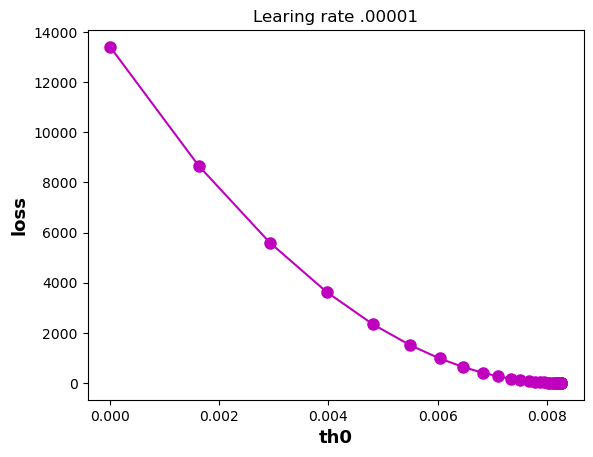

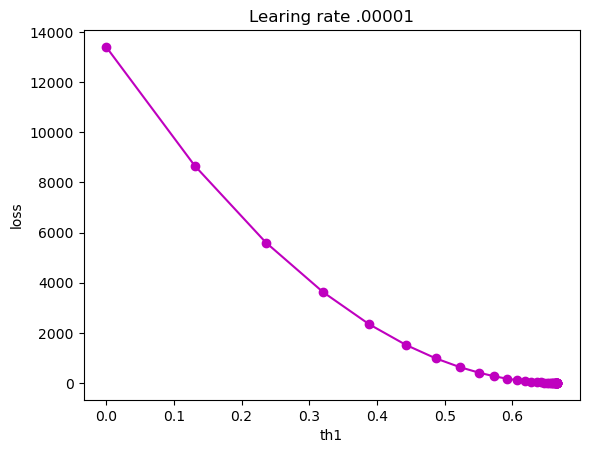

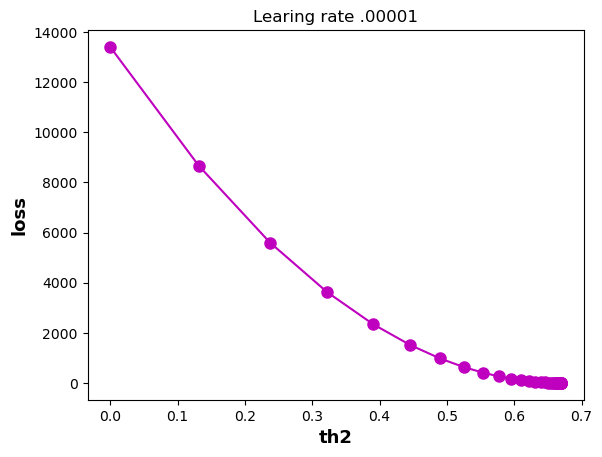

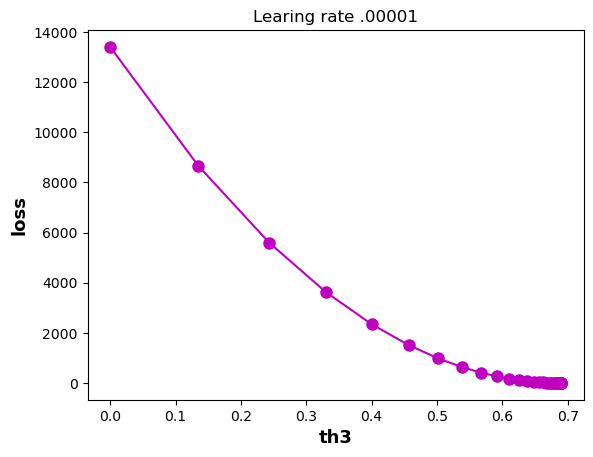

In [25]:
plt.figure()
plt.plot(array[:,0],loss,'mo-',markersize=8)
plt.title("Learing rate .00001")
plt.xlabel('th0',fontsize=13,fontweight='bold')
plt.ylabel('loss',fontsize=13,fontweight='bold')
plt.figure()
plt.plot(array[:,1],loss,'mo-',)
plt.title("Learing rate .00001")
plt.xlabel('th1')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,2],loss,'mo-',markersize=8)
plt.title("Learing rate .00001")
plt.xlabel('th2',fontsize=13,fontweight='bold')
plt.ylabel('loss',fontsize=13,fontweight='bold')
plt.figure()
plt.plot(array[:,3],loss,'mo-',markersize=8)
plt.title("Learing rate .00001")
plt.xlabel('th3',fontsize=13,fontweight='bold')
plt.ylabel('loss',fontsize=13,fontweight='bold')

plt.show()

- Use <b>learning rate = 0.0001</b> and see the difference in learning curves and <b>r2_score</b>.
- You can also try larger learning rate i.e. <b>0.001</b> and see how the optimizer diverges and <b>r2_score</b>.

In [26]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

Y=Y.reshape(-1,1)
X=data[:,0:3]
X= np.hstack(                 (   np.ones(     (X.shape[0], 1)   )  , X      )   )
m=data.shape[0] 

alpha=0.0001
max_iter=10000
grad_check=0.1
conv_check=0.001
th=np.zeros((4,1))
gama=.001
v_prev=0
loss=[]
theats_arr=[]

for i in range(max_iter):
    print(f"****************** Iteration  {i} ******************** \n")
    theats_arr.append(th)
    h=X@th                                  #  25*4   @ 4*1   ==>    25*1
    print(f" h(x) = \n{h}")
    e=h-Y                                   #  25*1 -   25*1  ==>25*1 
    print(f"E(x) = \n{e}")
    j=np.linalg.norm(e)**2/(2*m)
    print(f"J = \n{j}")
    loss.append(j)
    grad=(X.T @e )/m                        #  4*25 @  25*1 ==>4*1
    print(f"grad = {grad}")
    grad_norm=np.linalg.norm(grad)
    print(f"grad_norm = \n{grad_norm}")
    if grad_norm<grad_check:
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break 
    if i>0 and  abs(loss[i-1]-loss[i]) < conv_check :
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break
    v_cur=gama*v_prev+alpha*grad
    th=th-v_cur
    v_prev+=v_cur
    print(f"new_theats = \n{th}")
    

    

****************** Iteration  0 ******************** 

 h(x) = 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
E(x) = 
[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]
J = 
13405.98
grad = [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
grad_norm = 
22917.545989219703
new_theats = 
[[0.016204]
 [1.30758 ]
 [1.31472 ]
 [1.346708]]
****************** Iteration  1 ******************** 

 h(x) = 
[[301.650244]
 [362.560348]
 [357.234064]
 [389.057244]
 [276.510624]
 [203.864004]
 [291.22502 ]
 [215.899264]
 [338.842264]
 [313.855728]
 [280.579308]
 [276.659996]
 [369.069972]
 [306.802308]
 [292.564588]
 [367.915192]
 [292.187588]
 [349.498828]
 [351.854372]
 [314.82572 ]
 [341.507404]
 [340.132136]
 [325.5993

In [27]:
h=x@theats_arr[-1]
h

array([[153.50245185],
       [185.16303517],
       [182.0624296 ],
       [198.74253476],
       [141.00076246],
       [104.74575079],
       [149.26651774],
       [111.3375706 ],
       [173.76805896],
       [162.03385716],
       [143.53414575],
       [141.99945819],
       [187.63307358],
       [155.36030779],
       [150.10348547],
       [188.27648651],
       [147.60514043],
       [179.27243425],
       [178.70492435],
       [159.91006357],
       [174.96994382],
       [174.11691887],
       [166.63149696],
       [153.68958377],
       [191.57706977]])

In [28]:
r2_score(Y,h)

0.9846301036276055

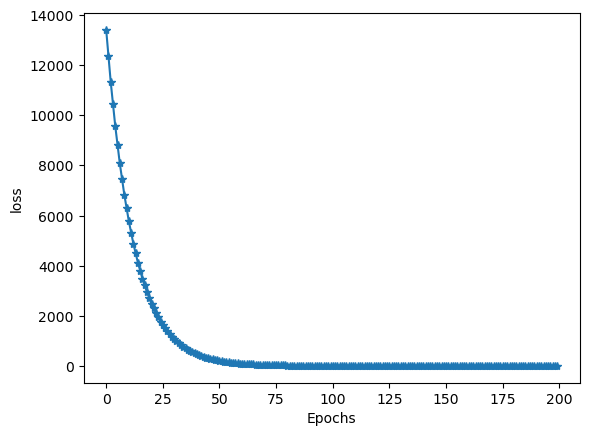

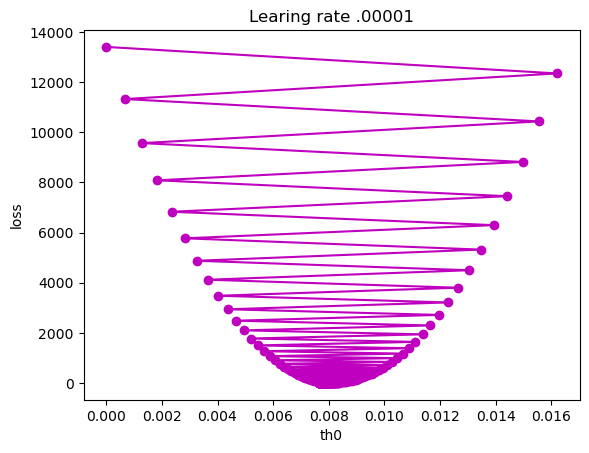

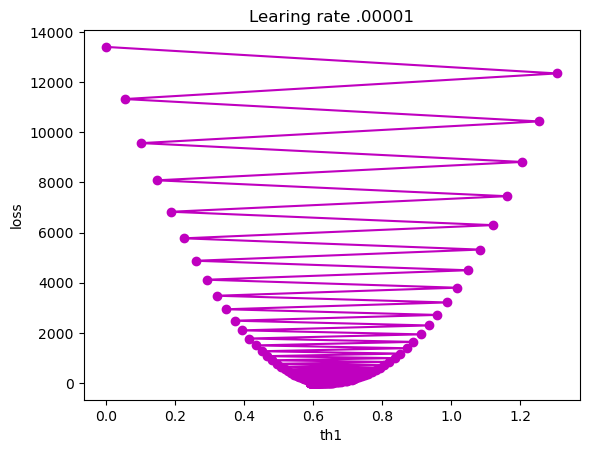

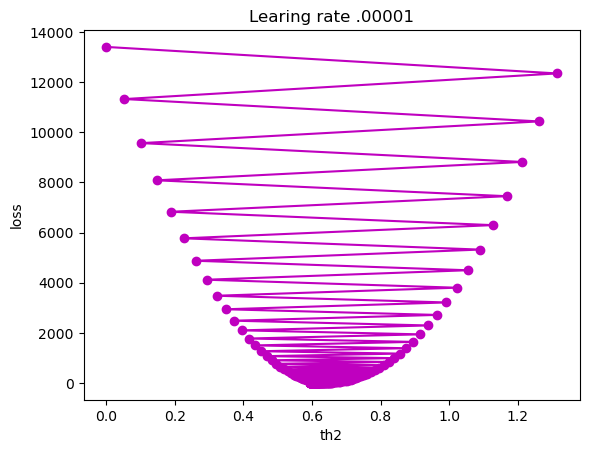

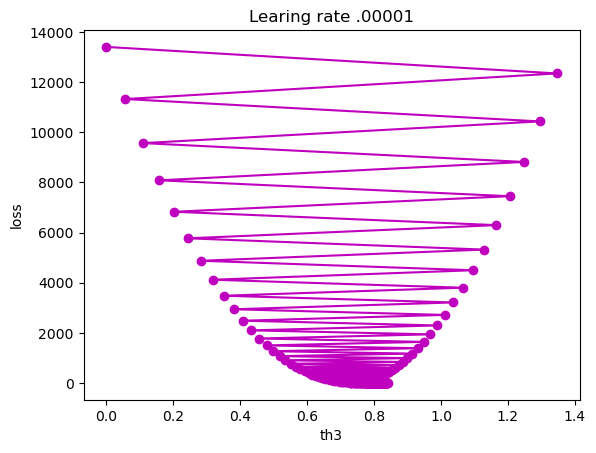

In [29]:
plt.figure()
plt.plot(loss,'*-')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

array=np.array(theats_arr)
plt.figure()
plt.plot(array[:,0],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th0')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,1],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th1')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,2],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th2')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,3],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th3')
plt.ylabel('loss')

plt.show()

In [30]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

Y=Y.reshape(-1,1)
X=data[:,0:3]
X= np.hstack(                 (       np.ones(     (X.shape[0], 1)   )  , X      )                    )
m=data.shape[0] 
n_1=data.shape[1]
alpha=0.001
max_iter=500
grad_check=0.1
conv_check=0.001
th=np.zeros((4,1))
gama=0.001
v_prev=0
loss=[]
theats_arr=[]

for i in range(max_iter):
    print(f"****************** Iteration  {i} ******************** \n")
    theats_arr.append(th)
    h=X@th                                  #  25*4   @ 4*1   ==>    25*1
    print(f" h(x) = \n{h}")
    e=h-Y                                   #  25*1 -   25*1  ==>25*1 
    print(f"E(x) = \n{e}")
    j=np.linalg.norm(e)**2/(2*m)
    print(f"J = \n{j}")
    loss.append(j)
    grad=(X.T @e )/m                        #  4*25 @  25*1 ==>4*1
    print(f"grad = {grad}")
    grad_norm=np.linalg.norm(grad)
    print(f"grad_norm = \n{grad_norm}")
    if grad_norm<grad_check:
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break 
    if i>0 and  abs(loss[i-1]-loss[i]) < conv_check :
        print(f"****************** Training Report ********************\n")
        print(f"Gradient Descent converged after {i+1} epochs \n ")
        print(f"theta_Opt :\n{th}\n")
        print(f"Error Vector: :\n{e}\n")
        print(f"Cost  :\n{j}\n")
        print(f" y_predict:\n{h}\n")
        print(f" y_actual:\n{Y}\n")
        break
    v_cur=gama*v_prev+alpha*grad
    th=th-v_cur
    v_prev+=v_cur
    print(f"new_theats = \n{th}")
    

    

****************** Iteration  0 ******************** 

 h(x) = 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
E(x) = 
[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]
J = 
13405.98
grad = [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
grad_norm = 
22917.545989219703
new_theats = 
[[ 0.16204]
 [13.0758 ]
 [13.1472 ]
 [13.46708]]
****************** Iteration  1 ******************** 

 h(x) = 
[[3016.50244]
 [3625.60348]
 [3572.34064]
 [3890.57244]
 [2765.10624]
 [2038.64004]
 [2912.2502 ]
 [2158.99264]
 [3388.42264]
 [3138.55728]
 [2805.79308]
 [2766.59996]
 [3690.69972]
 [3068.02308]
 [2925.64588]
 [3679.15192]
 [2921.87588]
 [3494.98828]
 [3518.54372]
 [3148.2572 ]
 [3415.07404]
 [3401.32136]
 [3255.993

C:\Users\ALL IN ONE\AppData\Local\Temp\ipykernel_19596\4085501300.py:41: RuntimeWarning: invalid value encountered in scalar subtract
  if i>0 and  abs(loss[i-1]-loss[i]) < conv_check :
C:\Users\ALL IN ONE\AppData\Local\Temp\ipykernel_19596\4085501300.py:28: RuntimeWarning: overflow encountered in matmul
  grad=(X.T @e )/m                        #  4*25 @  25*1 ==>4*1
C:\Users\ALL IN ONE\AppData\Local\Temp\ipykernel_19596\4085501300.py:50: RuntimeWarning: invalid value encountered in add
  v_cur=gama*v_prev+alpha*grad


grad_norm = 
nan
new_theats = 
[[nan]
 [nan]
 [nan]
 [nan]]
****************** Iteration  282 ******************** 

 h(x) = 
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
E(x) = 
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
J = 
nan
grad = [[nan]
 [nan]
 [nan]
 [nan]]
grad_norm = 
nan
new_theats = 
[[nan]
 [nan]
 [nan]
 [nan]]
****************** Iteration  283 ******************** 

 h(x) = 
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
E(x) = 
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan

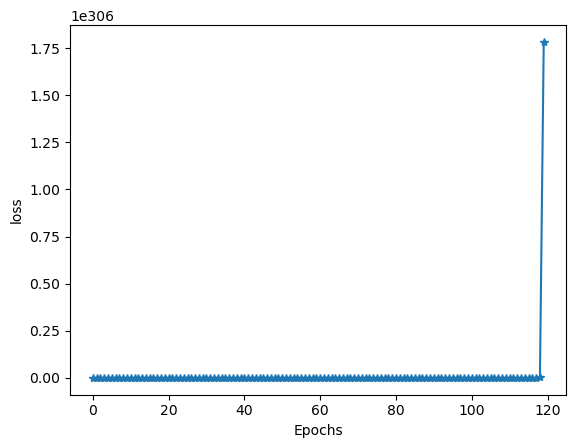

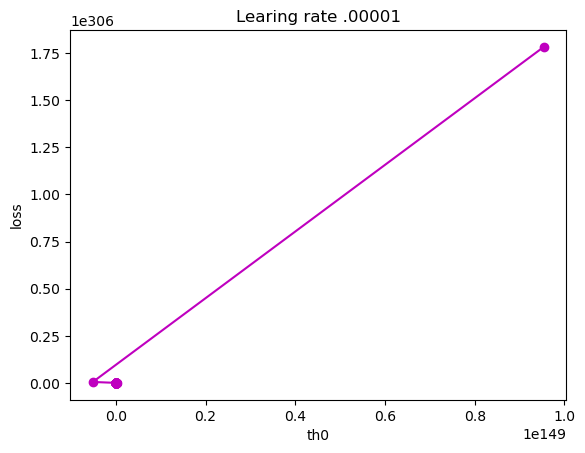

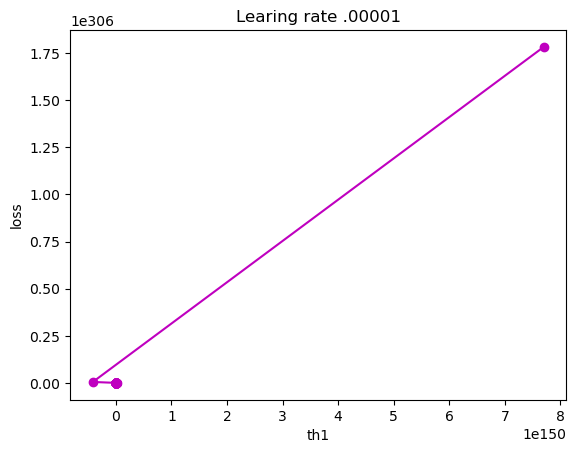

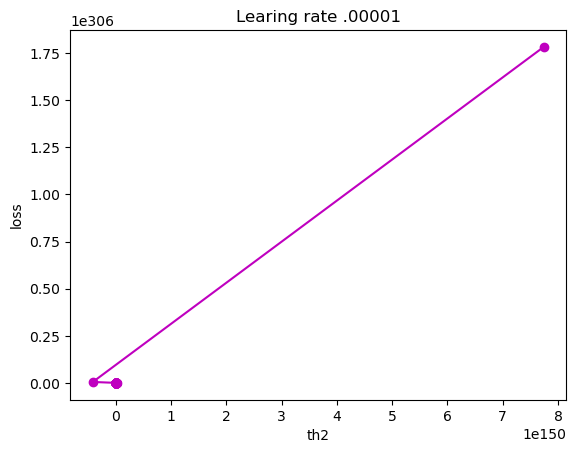

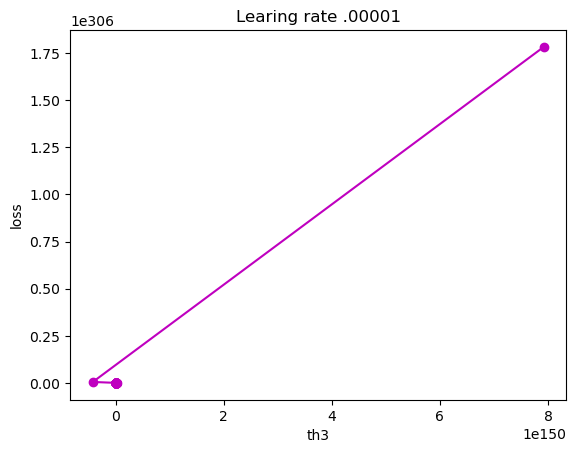

In [31]:
plt.figure()
plt.plot(loss,'*-')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

array=np.array(theats_arr)
plt.figure()
plt.plot(array[:,0],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th0')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,1],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th1')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,2],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th2')
plt.ylabel('loss')
plt.figure()
plt.plot(array[:,3],loss,'mo-')
plt.title("Learing rate .00001")
plt.xlabel('th3')
plt.ylabel('loss')

plt.show()

## Optional Part: Make all as funtions:
### You can modify the implementation to be a function taking all hyperparameters and return all needed outputs.
### You can also make your plotting using functions taking the outputs and return the learning curves.
### This will make your life easy when you want to try different values of hyperparametrs.

#### Use your previous code and create a function to perform GD for Muli-variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations, stop conditions values.
#### The function should return the following:
##### All Theta values till converge, and equivellant Losses.

In [72]:

    
def DG_momuntal_Muli_variable_linear_regression(X,Y,alpha=.0001,gama=.001,max_iter=1000,grad_check=.001,conv_check=.001):
    
    m=X.shape[0]
    onesArray=   np.ones(  (m, 1)   )
    X= np.hstack(  ( np.ones(  (m, 1)   )  , X    )  )
    n_1=X.shape[1]
    th=np.zeros((n_1,1))
    v_prev=0 
    loss=[]
    theats_arr=[]
    for i in range(max_iter):
        print(f"****************** Iteration  {i} ******************** \n")
        theats_arr.append(th)
        h=X@th                                  #  25*4   @ 4*1   ==>    25*1
        e=h-Y                                   #  25*1 -   25*1  ==>25*1 
        print(f"Erorr = \n{e}")
        j=np.linalg.norm(e)**2/(2*m)
        print(f"J = \n{j}")
        loss.append(j)
        grad=(X.T @e )/m                        #  4*25 @  25*1 ==>4*1
        print(f"grad = {grad}")
        grad_norm=np.linalg.norm(grad)
        print(f"grad_norm = \n{grad_norm}")
        if grad_norm<grad_check:
            print(f"****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i+1} epochs \n ")
            print(f"theta_Opt :\n{th}\n")
            print(f"Error Vector: :\n{e}\n")
            print(f"Cost  :\n{j}\n")
            print(f" y_predict:\n{h}\n")
            print(f" y_actual:\n{Y}\n")
            break 
        if i>0 and  abs(loss[i-1]-loss[i]) < conv_check :
            print(f"****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i+1} epochs \n ")
            print(f"theta_Opt :\n{th}\n")
            print(f"Error Vector: :\n{e}\n")
            print(f"Cost  :\n{j}\n")
            print(f" y_predict:\n{h}\n")
            print(f" y_actual:\n{Y}\n")
            break
        v_cur=gama*v_prev+ (alpha*grad)
        th=th-v_cur
        v_prev+=v_cur
        print(f"new_theats = \n{th}")
    return theats_arr,loss
        
T,loss=DG_momuntal_Muli_variable_linear_regression(x,Y,.00001,.0001,10000,.01,.001)
    

****************** Iteration  0 ******************** 

Erorr = 
[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [-175.]
 [-149.]
 [-192.]]
J = 
13405.98
grad = [[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]
grad_norm = 
22917.545989219703
new_theats = 
[[0.0016204]
 [0.130758 ]
 [0.131472 ]
 [0.1346708]]
****************** Iteration  1 ******************** 

Erorr = 
[[-121.8349756]
 [-148.7439652]
 [-144.2765936]
 [-157.0942756]
 [-114.3489376]
 [ -80.6135996]
 [-119.877498 ]
 [ -93.4100736]
 [-141.1157736]
 [-132.6144272]
 [-112.9420692]
 [-113.3340004]
 [-147.0930028]
 [-121.3197692]
 [-118.7435412]
 [-155.2084808]
 [-117.7812412]
 [-148.0501172]
 [-141.8145628]
 [-127.517428 ]
 [-142.8492596]
 [-140.9867864]
 [-142.4400616]
 [-118.5869688]
 [-154.4249896]]
J = 
8668.481648916413
grad = [[  -130.28089594]
 [-10512.48957462]
 [-1

In [73]:
def calc_r2(Y,t):
    h=X@t[-1]
    return r2_score(Y,h)

t=np.array(T)
#print(X)
t=t.reshape((-1,4))
x=calc_r2(Y,t)
print(x)


0.978955235343897


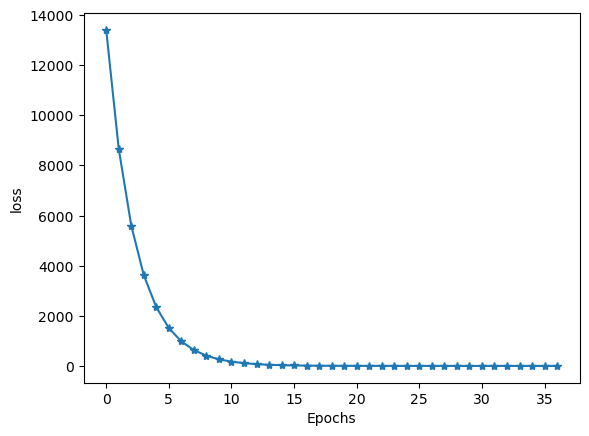

In [74]:
def plot_loss(loss):
    plt.figure()
    plt.plot(loss,'*-')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.show()

plot_loss(loss)
    

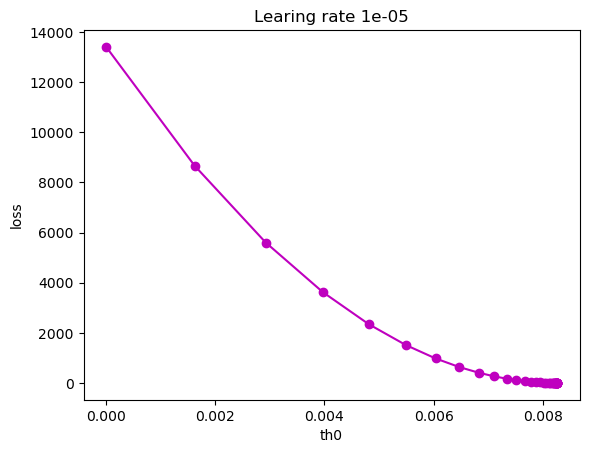

In [75]:
def plot_theta_loss(theats_arr,loss,alpha,theata):
    array=np.array(theats_arr)
    plt.figure()
    plt.plot(array[:,theata],loss,'mo-')
    plt.title(f"Learing rate {alpha}")
    plt.xlabel(f"th{theata}")
    plt.ylabel('loss')
    plt.show()
    
plot_theta_loss(T,loss,0.00001,0)

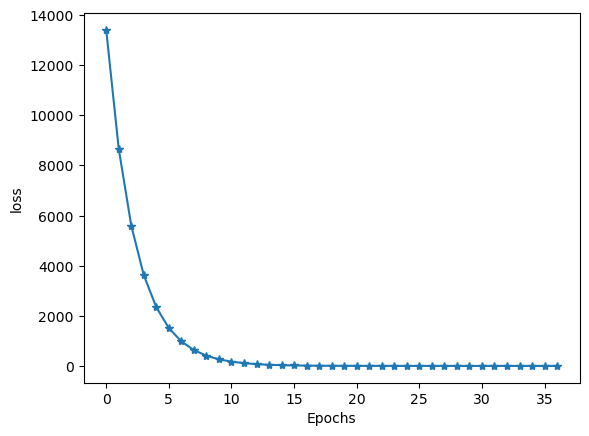

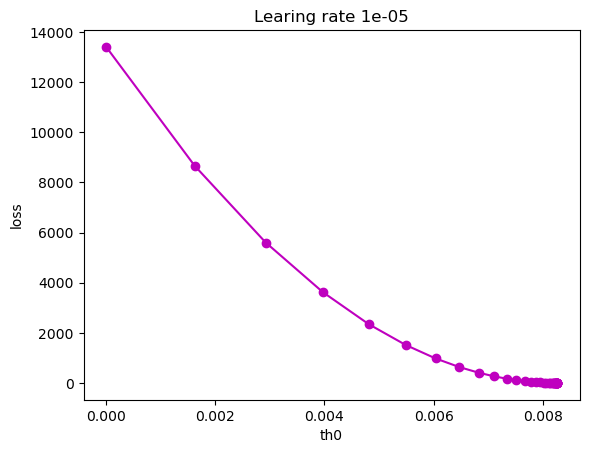

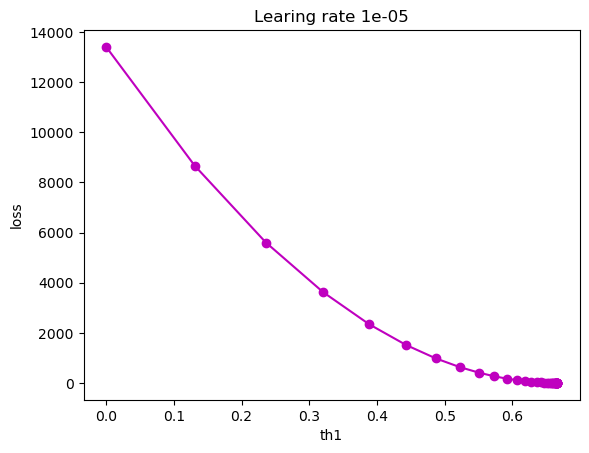

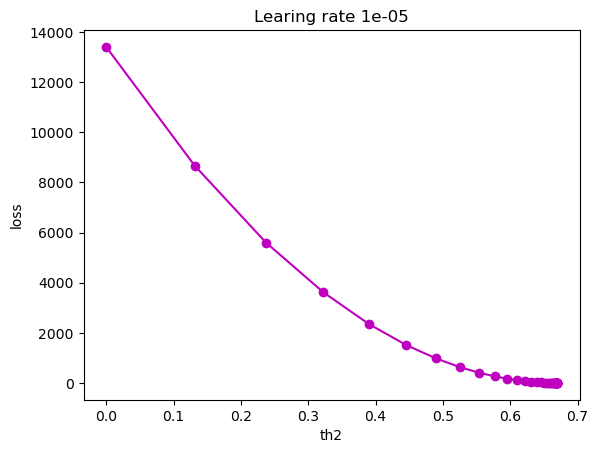

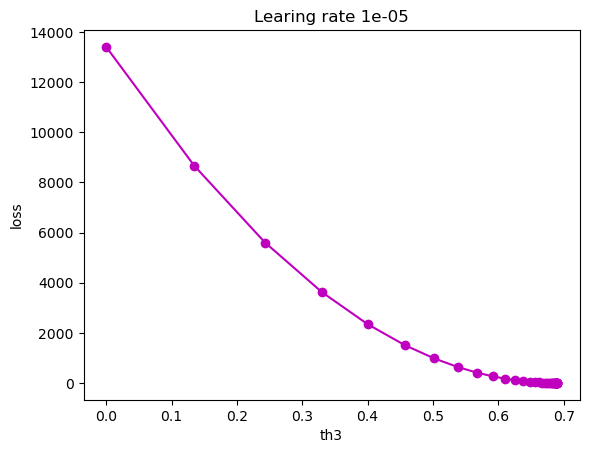

In [76]:
plot_loss(loss,)
ths_arr = np.array(T).reshape((-1,4))
plot_theta_loss(T,loss,0.00001,0)
plot_theta_loss(T,loss,0.00001,1)
plot_theta_loss(T,loss,0.00001,2)
plot_theta_loss(T,loss,0.00001,3)

